# Public Opinions on ESG --- _An Analysis of Twitter Posts_

## Project Aim and Method

The idea of ESG has been turning into a buzzword. Since 2016, United Nations started promoting __[SDGs (Sustainable Development Goals)](https://unstats.un.org/sdgs/report/2016/)__. And since 2017, the number of publications on this topic was almost doubling each year __[(Senadheera, Gregory, Rinklebe, Farrukh, Rhee & Yong, 2022)](https://www.tandfonline.com/doi/full/10.1080/27658511.2022.2125869)__. The surge in ESG metrics and reporting fuels its landing from an idealistic concept to a reality that companies, consumers and governments need to embrace.<br>
<br>
However, the discussion around ESG is never one-sidely supportive. ESG is framed by some as profit speculation deviating from the goal of social conscience. __[(The Economist, 2022)](economist.com/leaders/2022/09/29/the-fundamental-contradiction-of-esg-is-being-laid-bare?utm_medium=cpc.adword.pd&utm_source=google&ppccampaignID=17210591673&ppcadID=&utm_campaign=a.22brand_pmax&utm_content=conversion.direct-response.anonymous&gclid=CjwKCAiA3pugBhAwEiwAWFzwdVmFnWUx-DL54IAsbZAxHU02MsklhtHuaoPryzCKLJxguRTeUM9svxoCKOMQAvD_BwE&gclsrc=aw.ds)__. And there are fierce arguments surrounding whether companies should compromise the traditional priority of maximizing the profit of shareholders. After starting as a niche corner of the finance world, ESG investing has since exploded to become a major force on Wall Street, and the latest front in the cultural schism __[(Associate Press, 2022)](https://www.usnews.com/news/business/articles/2023-03-01/what-is-esg-investing-and-why-do-some-hate-it-so-much)__. Therefore, examining public feedback about ESG is significant for policymakers and world leaders in order to refine relative regulations and to build full-fledged guidelines. 

In order to perceive the public’s opinion on ESG, the project aims to collect Twitter users’ posts containing “ESG” replying to five large media outlet accounts, namely __[the New York Times](https://twitter.com/nytimes)__, __[the Wall Street Journal](https://twitter.com/WSJ)__, __[the Washington Post](https://twitter.com/washingtonpost)__, __[the Fox News](https://twitter.com/FoxNews)__ and __[the CNN Breaking News](https://twitter.com/cnnbrk)__ from **March 1 in 2022 to March 1 in 2023**. The data for collection is concentrated on people’s replies to media outlets because media outlets play a significant role to bridge the public and policymakers, and frequently arouses dense discussion on heated topics in the public sphere. Therefore, those posts replying to the media accounts could provide us with diverse and representative thoughts.

## 1. Data Loading & Data Cleaning

### Import relevant libraries to load Twitter data

_Pandas is directly used here to read the twitter data because the data is already in csv format_

In [95]:
import json
import pandas as pd

In [96]:
tweets_df = pd.read_csv('esg_tweets.csv', parse_dates = ['created_at'])
tweets_df

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version
0,1630710523611291648,1630698026808274949,1.630698e+18,NaN,NaN,1861126345,1367531,FoxNews,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-23T21:38:14+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0
1,1630704494882476032,1630360895242084354,1.630361e+18,NaN,NaN,1577404395318173696,3108351,WSJ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-23T21:38:14+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0
2,1630701892245286921,1630360895242084354,1.630361e+18,NaN,NaN,1306702770741878784,3108351,WSJ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-23T21:38:14+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0
3,1630700660143407108,1630360895242084354,1.630361e+18,NaN,NaN,1585838596686319618,3108351,WSJ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-23T21:38:14+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0
4,1630700655399809024,1630360895242084354,1.630361e+18,NaN,NaN,2696516137,3108351,WSJ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-23T21:38:14+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1500160739880886273,1500154176554225664,1.500154e+18,NaN,NaN,842200032996667392,1367531,FoxNews,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-23T21:38:36+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0
888,1499554302993453060,1499552706419175427,1.499553e+18,NaN,NaN,1310968673864216576,1367531,FoxNews,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-23T21:38:36+00:00,https://a

### CleanTwitter data by selecting key columns

In [97]:
tweets_df.columns

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'in_reply_to_username',
       'retweeted_user_id', 'retweeted_username', 'quoted_user_id',
       'quoted_username', 'created_at', 'text', 'lang', 'source',
       'public_metrics.impression_count', 'public_metrics.reply_count',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.like_count', 'reply_settings', 'edit_history_tweet_ids',
       'edit_controls.edits_remaining', 'edit_controls.editable_until',
       'edit_controls.is_edit_eligible', 'possibly_sensitive',
       'withheld.scope', 'withheld.copyright', 'withheld.country_codes',
       'entities.annotations', 'entities.cashtags', 'entities.hashtags',
       'entities.mentions', 'entities.urls', 'context_annotations',
       'attachments.media', 'attachments.media_keys',
       'attachments.poll.duration_mi

In [98]:
tweets_df.rename(columns={'created_at': 'date',
                          'public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 
                          'author.name': 'name',
                          'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 
                          'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies',
                           'author.description': 'user_bio',
                         'in_reply_to_username': 'reply_to'},
                            inplace=True)
tweets_df = tweets_df[['date', 'username', 'name', 'verified', 'text', 'retweets',
           'likes', 'replies',  'quotes', 'reply_to','user_bio']]
tweets_df = tweets_df.sort_values(by='likes', ascending=False)
tweets_df

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio
709,2022-06-10 23:48:59+00:00,ZachWinnerCRE,Zach Winner,False,"@WSJ It's obvious that these ESG funds are bogus. Case in point, removing #TSLA from the S&amp;P ESG fund, a company that single handedly brought back the EV, and has a solar energy subdivision, while ExxonMobil stays in the fund.",19,253,5,1,WSJ,Providing Multifamily Investment Opportunities | Receive Ongoing Cash-Flow | Build Long-Term Wealth | Significant Tax Benefits | Minimum Investment $50K
204,2022-12-21 12:06:52+00:00,EntArchDude,Structure is Fate,False,@FoxNews - Climate change is a scam.\n -Green energy is a scam.\n- ESG is a scam.\n-Ukraine is a scam.\n-DEI is a scam.\n-The vaccines were a scam.\nNext...,23,228,16,0,FoxNews,"BSEE, MS Eng Mgmt, CISSP, ISSAP, FEAF Black belt, DoDAF Black belt, TOGAF, SABSA, 40+ years, Comparative Religion (hobby), INTJ, ACOA, Adopted, Veteran..."
216,2022-12-12 17:49:52+00:00,LibertyLockPod,Liberty Lockdown w/ Clint Russell,False,"@nytimes Yes, we understand what ESG is",0,165,0,0,nytimes,"Joe Rogan meets Ron Paul in podcast form, check it out, you'll love it.\nhttps://t.co/IJpM7jylLa\nSupport the show: https://t.co/30fApDj9uP"
705,2022-06-11 03:05:06+00:00,2Bjeromemichael,JeromeMichael (master generalist),False,"@WSJ Instead of ESG (environmental, social, governance), the focus should be ELR (ethical, liberal, responsible). We should hold accountable those companies who espouse principled business practices that promote individual liberty while assuming full responsibility for their actions.",5,58,10,1,WSJ,Author ~ Artist ~ Sovereign Individual ~ Critical Thinker ~ Skeptical Optimist ~ Freedom Fighter ~ “Change your mind. Change yourself. Change the world.”
800,2022-05-18 21:41:49+00:00,bobbycarlisle,Bobby,False,@FoxNews If Tesla isn’t a top 500 ESG company who is?,0,33,7,0,FoxNews,"Triple Dawg! BBAx2, MBT. All around pleasant fellow. #GODAWGS!!"
...,...,...,...,...,...,...,...,...,...,...,...
174,2023-01-13 11:03:54+00:00,DgoMtnMan,Cessante ratione legis cessat ipsa lex,False,@WSJ Translation- BlackRock lost more money then intended via ESG b.s. investing. Now they are going for 401k providers of small business.... \n😐,0,0,0,0,WSJ,"Bio.... \n1-None of your business 😐 \n2- Bio weapons suck, CBRN sucks \n3- Bio class needs to be re taken by all yall m.f.\n4- Bionicle best Lego show, fight me 😐"
170,2023-01-17 23:57:05+00:00,TannerBoyle15,.,False,@washingtonpost .... didn’t see it coming 🤣😂🤣😂 #ESG #ClimateAction #ClimateScam,0,0,0,0,washingtonpost,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
471,2022-09-07 04:10:07+00:00,Jaredduke8,Jared duke,False,"@FoxNews Michael visit California today , you will learn all about ESG https://t.co/VrzfgUcMZJ",0,0,0,0,FoxNews,Passionate about truth and I speak my mind
169,2023-01-18 00:14:21+00:00,ministryftruth,sanderscorey,False,@WSJ A soon to be normal outcome for people investing $ in Liberal firms that give their money away to ESG causes. Where did my money go? Lol,0,0,0,0,WSJ,NaN


## 2. Hashtag Analysis

### Add number of count, retweets and quote to get total count of each tweet

In [99]:
tweets_df = tweets_df.assign(count=1)
tweets_df['total_count']= tweets_df['count'] + tweets_df['retweets'] + tweets_df['quotes']

### Extract hashtags out of every post

In [100]:
def extract_hashtags_list(text):
    hashtag_list = []
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])
    return hashtag_list
tweets_df['hashtags_list'] = tweets_df['text'].apply(extract_hashtags_list)
tweets_df.sort_values(by='hashtags_list', ascending=False)[:15]

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio,count,total_count,hashtags_list
658,2022-07-04 16:27:26+00:00,SEALteamDISCO,robbie rob,False,@washingtonpost But according to Congressional Testimony.... Google is Not tracking people! #wtf #esg,0,4,0,0,washingtonpost,NaN,1,1,"[wtf, esg]"
561,2022-07-29 16:53:28+00:00,nancylevine,Nancy Levine Stearns 🐶,False,"@FoxNews What is ESG? It's an investment strategy that prioritizes Environmental, Social, and Corporate Governance factors. So @GovRonDeSantis is against #sustainability and #ClimateAction. DeSantis supports #ChristianNationalists NAZIS. #Florida #ESG",1,0,1,0,FoxNews,"Author, The Tao of Pug® (Penguin/Skyhorse) | Bylines: Sports Illustrated, Salon, Raw Story, Rantt Media | NYU Stern | retired recruiter | #CorpGov #ESG",1,2,"[sustainability, ClimateAction., ChristianNationalists, Florida, ESG]"
642,2022-07-12 02:30:32+00:00,marshianmanilow,Marshianmanilow,False,@WSJ @WSJopinion @andykessler And you “don’t seem” to know what you’re talking about ya giant entitled ball bag. I love Alt right twots that think esg can be abused terms like Benghazi pedo Pizza steal MAGA and Whitewater in the same ignorant shit sandwich. #sucemabite #especedecon,0,0,0,0,WSJ,"I’m not on Twitter to exchange ideas, read your opinions or hear your whining. I am telling you how it is, if that’s inconvenient, too bad.",1,1,"[sucemabite, especedecon]"
219,2022-12-09 22:55:14+00:00,EEA_Org,Enterprise Engmnt,False,"@WSJ New EU Sustainability Reporting Standards require many US companies to disclose how they engage with, and keep their promises with all stakeholders. And there is nothing the US can do. #stakeholdercapitalism\nhttps://t.co/MaOsUThVhB",0,0,0,0,NaN,"Enterprise Engagement Alliance (EEA) supports engagement as an enterprise-wide effort to support the emergence of Stakeholder Capitalism--the ""S"" of ESG.",1,1,[stakeholdercapitalism\nhttps://t.co/MaOsUThVhB]
221,2022-12-09 22:48:25+00:00,EEA_Org,Enterprise Engmnt,False,"@WSJ New EU Sustainability Reporting Standards require many US companies to disclose how they engage with, and keep their promises with all stakeholders. And there is nothing the US can do. #stakeholdercapitalism\nhttps://t.co/MaOsUT0SfB",0,0,0,0,NaN,"Enterprise Engagement Alliance (EEA) supports engagement as an enterprise-wide effort to support the emergence of Stakeholder Capitalism--the ""S"" of ESG.",1,1,[stakeholdercapitalism\nhttps://t.co/MaOsUT0SfB]
218,2022-12-10 00:57:03+00:00,EEA_Org,Enterprise Engmnt,False,"@washingtonpost New EU Sustainability Reporting Standards require many US companies to disclose how they engage with, and keep their promises with all stakeholders. And there is nothing the US can do. #stakeholdercapitalism\nhttps://t.co/MaOsUT0SfB",0,0,0,0,NaN,"Enterprise Engagement Alliance (EEA) supports engagement as an enterprise-wide effort to support the emergence of Stakeholder Capitalism--the ""S"" of ESG.",1,1,[stakeholdercapitalism\nhttps://t.co/MaOsUT0SfB]
220,2022-12-09 22:48:37+00:00,EEA_Org,Enterprise Engmnt,False,"@cnnbrk New EU Sustainability Reporting Standards require many US companies to disclose how they engage with, and keep their promises with all stakeholders. And there is nothing the US can do. #stakeholdercapitalism\nhttps://t.co/MaOsUT0SfB",0,0,0,0,NaN,"Enterprise Engagement Alliance (EEA) supports engagement as an enterprise-wide effort to support the emergence of Stakeholder Capitalism--the ""S"" of ESG.",1,1,[stakeholdercapitalism\nhttps://t.co/MaOsUT0SfB]
389,2022-10-06 17:33:30+00:00,joltsik,Jon Oltsik,False,@wsj article from @JimRundle describes how incident responders are overwhelmed due to the spike in cyber-attacks like #ransomware. Very consistent with annual research from @esg_global and @ISSAINTL: https://t.co/dc9SwzVbsE #cybersecurity #infosec #incidentresponse,0,0,0,0,NaN,Distinguished analyst and fellow at the Enterprise Strategy Group.,1,1,"[ransomware., cybersecurity, infosec, incidentrespon

### Explode hashtags column and drop empty hashtags

In [101]:
tweets_df=tweets_df.explode("hashtags_list")
hashtags_df=tweets_df.dropna(subset=['hashtags_list'])
hashtags_df.sort_values(by='total_count', ascending=False)[:10]

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio,count,total_count,hashtags_list
709,2022-06-10 23:48:59+00:00,ZachWinnerCRE,Zach Winner,False,"@WSJ It's obvious that these ESG funds are bogus. Case in point, removing #TSLA from the S&amp;P ESG fund, a company that single handedly brought back the EV, and has a solar energy subdivision, while ExxonMobil stays in the fund.",19,253,5,1,WSJ,Providing Multifamily Investment Opportunities | Receive Ongoing Cash-Flow | Build Long-Term Wealth | Significant Tax Benefits | Minimum Investment $50K,1,21,TSLA
510,2022-08-18 19:47:37+00:00,wardiamonds,Wardiamonds,False,"@nytimes Meanwhile, Israeli blood diamonds that fund a nuclear-armed apartheid regime under investigation by the ICC for commiting war crimes flood the market labelled conflict free. \n#ESG #SDGs #CSR #BDS \n https://t.co/QWDx0rfXPE https://t.co/KId0PVTcde",4,3,0,0,nytimes,"Israeli cut & polished blood diamonds fund unregulated nukes, apartheid & war crimes are NOT banned by Kimberley Process are labelled conflict-free.",1,5,BDS
510,2022-08-18 19:47:37+00:00,wardiamonds,Wardiamonds,False,"@nytimes Meanwhile, Israeli blood diamonds that fund a nuclear-armed apartheid regime under investigation by the ICC for commiting war crimes flood the market labelled conflict free. \n#ESG #SDGs #CSR #BDS \n https://t.co/QWDx0rfXPE https://t.co/KId0PVTcde",4,3,0,0,nytimes,"Israeli cut & polished blood diamonds fund unregulated nukes, apartheid & war crimes are NOT banned by Kimberley Process are labelled conflict-free.",1,5,CSR
510,2022-08-18 19:47:37+00:00,wardiamonds,Wardiamonds,False,"@nytimes Meanwhile, Israeli blood diamonds that fund a nuclear-armed apartheid regime under investigation by the ICC for commiting war crimes flood the market labelled conflict free. \n#ESG #SDGs #CSR #BDS \n https://t.co/QWDx0rfXPE https://t.co/KId0PVTcde",4,3,0,0,nytimes,"Israeli cut & polished blood diamonds fund unregulated nukes, apartheid & war crimes are NOT banned by Kimberley Process are labelled conflict-free.",1,5,SDGs
556,2022-08-01 18:55:03+00:00,Archer_Blog,Archer-Blog,False,@WSJ Get Rich or Die Blog'n: What is ESG? #ESG as in #ExtraSpecialGifts #ForMyNFT ? #IThinkYes #MyShinyNFT ? #WakasSwiftyNFT ? #Sustainability ?#Longevity ? #Earth ? #WeAimHigher @Archer_Ventures #GetRichorDieBlogn https://t.co/Rto83YtTtj,2,0,0,0,WSJ,A business and entertainment blog by @Archer_Ventures | #WeAimHigher🎯,1,3,IThinkYes
556,2022-08-01 18:55:03+00:00,Archer_Blog,Archer-Blog,False,@WSJ Get Rich or Die Blog'n: What is ESG? #ESG as in #ExtraSpecialGifts #ForMyNFT ? #IThinkYes #MyShinyNFT ? #WakasSwiftyNFT ? #Sustainability ?#Longevity ? #Earth ? #WeAimHigher @Archer_Ventures #GetRichorDieBlogn https://t.co/Rto83YtTtj,2,0,0,0,WSJ,A business and entertainment blog by @Archer_Ventures | #WeAimHigher🎯,1,3,GetRichorDieBlogn
556,2022-08-01 18:55:03+00:00,Archer_Blog,Archer-Blog,False,@WSJ Get Rich or Die Blog'n: What is ESG? #ESG as in #ExtraSpecialGifts #ForMyNFT ? #IThinkYes #MyShinyNFT ? #WakasSwiftyNFT ? #Sustainability ?#Longevity ? #Earth ? #WeAimHigher @Archer_Ventures #GetRichorDieBlogn https://t.co/Rto83YtTtj,2,0,0,0,WSJ,A business and entertainment blog by @Archer_Ventures | #WeAimHigher🎯,1,3,WeAimHigher
556,2022-08-01 18:55:03+00:00,Archer_Blog,Archer-Blog,False,@WSJ Get Rich or Die Blog'n: What is ESG? #ESG as in #ExtraSpecialGifts #ForMyNFT ? #IThinkYes #MyShinyNFT ? #WakasSwiftyNFT ? #Sustainability ?#Longevity ? #Earth ? #WeAimHigher @Archer_Ventures #GetRichorDieBlogn https://t.co/Rto83YtTtj,2,0,0,0,WSJ,A business and entertainment blog by @Archer_Ventures | #WeAimHigher🎯,1,3,Earth
556,2022-08-01 18:55:03+00:00,Archer_Blog,Archer-Blog,False,@WSJ Get Rich or Die Blog'n: What is ESG? #ESG as in #ExtraSpecialGifts #ForMyNFT ? #IThinkYes #MyShinyNFT ? #WakasSwiftyNFT ? #Sustainability ?#Longevity ? #Earth ? #WeAimHigher @Archer_Ventures #GetRichorDieBlogn https://t.co/Rto83YtTtj,2,0,0,0,WSJ,A business and entertainment blog

### Extract the 10 hashtags that appeared most frequently

In [102]:
hashtags_df=hashtags_df[['date', 'total_count', 'hashtags_list']]
hashtags_df.sort_values(by='total_count', ascending=False)[:20]
hashtags_df=hashtags_df.groupby('hashtags_list').sum().sort_values(by='total_count', ascending=False).reset_index()[:10]
hashtags_df

,hashtags_list,total_count
0,ESG,58
1,TSLA,21
2,ClimateAction,16
3,Green,11
4,ClimateScam,10
5,esg,8
6,climatecrisis,7
7,SDGs,6
8,DisinformationGovernanceBoard,6
9,climate,5


### Utilize plotly library to visualize the most frequently used hashtags

In [103]:
import plotly.express as px
fig = px.pie(hashtags_df, values='total_count', names='hashtags_list', 
             title='Hashtags', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Hashtags including TSLA, ClimateAct, Green, ClimateScam, climatecrisis, DisinformationGovernanceBoard, SDGs and climate are highly mentioned.<br>
<br>
It is within expectation that hashtags related to climate, green concept and international goals like SDG are often contained in posts. However, **TSLA**, **ClimateScam**, and **DisinformationGovernanceBoard** hashtags are relatively unexpected in comparison.

### Extract tweets with often used hashtags in order to take a deeper look into hashtags

In [104]:
deep_hash_df=tweets_df.explode("hashtags_list")
deep_hash_df=tweets_df.dropna(subset=['hashtags_list'])
deep_hash_df.sort_values(by='total_count', ascending=False)

## The following code are adapted from Stack Overflow "How to test if a string contains one of the substrings in a list, in pandas?" discussion
## https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas
search_strings = ['TSLA', 'ClimateAction', 'Green', 'ClimateScam', 'climatecrisis', 'DisinformationGovernanceBoard', 
                  'SDGs', 'climate']
deep_hash_df = deep_hash_df[deep_hash_df['hashtags_list'].str.contains('|'.join(search_strings))]
deep_hash_df = deep_hash_df[['date', 'hashtags_list','username', 'name', 'verified', 'text', 'retweets',
           'likes', 'replies',  'quotes', 'reply_to','user_bio']]
deep_hash_df

,date,hashtags_list,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio
709,2022-06-10 23:48:59+00:00,TSLA,ZachWinnerCRE,Zach Winner,False,"@WSJ It's obvious that these ESG funds are bogus. Case in point, removing #TSLA from the S&amp;P ESG fund, a company that single handedly brought back the EV, and has a solar energy subdivision, while ExxonMobil stays in the fund.",19,253,5,1,WSJ,Providing Multifamily Investment Opportunities | Receive Ongoing Cash-Flow | Build Long-Term Wealth | Significant Tax Benefits | Minimum Investment $50K
620,2022-07-15 03:02:05+00:00,climate,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@nytimes History will be unkind and harsh towards morons like @Sen_JoeManchin Future generations will rightly remember him with disdain and contempt. In the #MidTerms2022 vote as if your life depends on it, because it does! #climate #climatecrisis #esg #green",2,9,1,0,nytimes,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |
620,2022-07-15 03:02:05+00:00,climatecrisis,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@nytimes History will be unkind and harsh towards morons like @Sen_JoeManchin Future generations will rightly remember him with disdain and contempt. In the #MidTerms2022 vote as if your life depends on it, because it does! #climate #climatecrisis #esg #green",2,9,1,0,nytimes,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |
666,2022-06-30 15:04:32+00:00,climatecrisis,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@cnnbrk This is SO fucked up! And outrageous. But sadly, expected. The conservative #SCOTUS judges have blood on their hands. Democrats need to take the gloves off NOW and fight against this shit. Our lives literally depend on it. #failedstate #scotus #EPA #ESG #Climate #climatecrisis",1,5,1,1,cnnbrk,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |
510,2022-08-18 19:47:37+00:00,SDGs,wardiamonds,Wardiamonds,False,"@nytimes Meanwhile, Israeli blood diamonds that fund a nuclear-armed apartheid regime under investigation by the ICC for commiting war crimes flood the market labelled conflict free. \n#ESG #SDGs #CSR #BDS \n https://t.co/QWDx0rfXPE https://t.co/KId0PVTcde",4,3,0,0,nytimes,"Israeli cut & polished blood diamonds fund unregulated nukes, apartheid & war crimes are NOT banned by Kimberley Process are labelled conflict-free."
455,2022-09-07 15:59:15+00:00,climate,Jon_F_Hale,Jon Hale,False,@WSJ @WSJopinion Another laughable dishonest take on #ESG. Do pension plan participants and beneficiaries really want MAGA Republicans ordering their investment fiduciaries NOT to consider #climate risk and other ESG-related risks?,0,2,0,0,WSJ,"Sustainable Investing, Morningstar, political scientist, Oak Park, and a few other topics. Opinions my own. #ESG #sustainability #susty #corpgov"
63,2023-02-19 16:57:51+00:00,Green,TannerBoyle15,.,False,"@nytimes #ESG #Green #Inflation ...... have fun being poor, cold, hungry and unsafe 🤑🤑🤑🤑https://t.co/J9ng44nUQg #ClimateAction #ClimateScam plan https://t.co/ExfMTDwRHs",1,2,0,0,nytimes,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
63,2023-02-19 16:57:51+00:00,ClimateAction,TannerBoyle15,.,False,"@nytimes #ESG #Green #Inflation ...... have fun being poor, cold, hungry and unsafe 🤑🤑🤑🤑https://t.co/J9ng44nUQg #ClimateAction #ClimateScam plan https://t.co/ExfMTDwRHs",1,2,0,0,nytimes,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
63,2023-02-19 16:57:51+00:00,ClimateScam,TannerBoyle15,.,False,"@nytimes #ESG #Green #Inflation ...... have fun being poor, cold, hungry and unsafe 🤑🤑🤑🤑https://t.co/J9ng44nUQg #ClimateAction #ClimateScam plan https://t.co/ExfMTDwRHs",1,2,0,0,nytimes,Change the Nar

### Extract posts with hashtag "TSLA" as it is a relatively surprising hashtag

In [105]:
deep_hash_df[deep_hash_df['hashtags_list'].str.contains('TSLA')]

,date,hashtags_list,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio
709,2022-06-10 23:48:59+00:00,TSLA,ZachWinnerCRE,Zach Winner,False,"@WSJ It's obvious that these ESG funds are bogus. Case in point, removing #TSLA from the S&amp;P ESG fund, a company that single handedly brought back the EV, and has a solar energy subdivision, while ExxonMobil stays in the fund.",19,253,5,1,WSJ,Providing Multifamily Investment Opportunities | Receive Ongoing Cash-Flow | Build Long-Term Wealth | Significant Tax Benefits | Minimum Investment $50K
781,2022-05-19 23:06:36+00:00,TSLA's,enan1776,Fre Enan1776,False,"@FoxNews More states need to join Idaho! The ESG is completely biased, look at #TSLA's stock fall just bc got kicked out. Sad thing is how many sheep took the bait.",0,0,0,0,FoxNews,"Patriot, Constitution lover, free bird, Politics not porn, Git outside and exercise, natural remedies"


The Tesla company is closely connected with people’s discussion regarding ESG. <br>
<br>Taking a closer look, it is found that people were complaining about **Tesla being kicked out of the S&P ESG fund because of Tesla’s lack of a low-carbon strategy and codes of business conduct,** __[(Kolodly, 2022)](https://www.cnbc.com/2022/05/18/why-tesla-was-kicked-out-of-the-sp-500s-esg-index.html)__. The negative attitudes were also be further fueled by Elon Musk's labeling ESG a “scam” after Tesla was removed from S&P’s ESG index __[(Johnson, 2022)](https://www.ft.com/content/e4a818e5-4039-46d9-abe0-b703f33d0f9b)__. <br><br>
Clearly, S&P's decision aroused some people’s doubt in ESG fund. For example, the most popular post said, _“It's obvious that these ESG funds are bogus. Case in point, removing #TSLA from the S&P ESG fund, a company that single handedly brought back the EV, and has a solar energy subdivision, while ExxonMobil stays in the fund.”_<br><br>

### Extract posts with hashtag "ClimateScam" 

In [106]:
deep_hash_df[deep_hash_df['hashtags_list'].str.contains('ClimateScam')]

,date,hashtags_list,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio
63,2023-02-19 16:57:51+00:00,ClimateScam,TannerBoyle15,.,False,"@nytimes #ESG #Green #Inflation ...... have fun being poor, cold, hungry and unsafe 🤑🤑🤑🤑https://t.co/J9ng44nUQg #ClimateAction #ClimateScam plan https://t.co/ExfMTDwRHs",1,2,0,0,nytimes,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
196,2022-12-28 18:53:31+00:00,ClimateScam,TannerBoyle15,.,False,@nytimes Day Fuck’n 1 in office #ESG #Green @ClimateEnvoy @ClimateReality #ClimateAction #ClimateScam @RosieBarton @melaniejoly @BobRae48 @RalphGoodale @telfordk @CP24 #Ableg #yyc #Yeg 🥳🤡🌍 https://t.co/DKwktikAG9,2,1,0,0,nytimes,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
37,2023-02-26 17:59:57+00:00,ClimateScam,TannerBoyle15,.,False,@FoxNews ..... anyone we know 🤫 #ESG #ClimateAction @ClimateReality #ClimateScam 🤑🤑🤑🤑 https://t.co/j2OkhkaqQ4,0,1,1,0,FoxNews,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
95,2023-02-07 23:12:45+00:00,ClimateScam,TannerBoyle15,.,False,@WSJ ..... thought the sea levels were rising @ClimateEnvoy @ClimateReality #ClimateEmergency #ESG #ClimateAction #ClimateScam https://t.co/hycJnFuuRb,0,0,0,0,WSJ,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
426,2022-09-22 13:37:05+00:00,ClimateScam,TannerBoyle15,.,False,@nytimes .... some dating back 1000 years 🤣😂🤣 #Chile #ESG #ClimateAction @ClimateEnvoy #ClimateScam #TrudeauResign 🤮🤮🤮 https://t.co/f0jZTV7a0Y,1,0,0,0,nytimes,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!
170,2023-01-17 23:57:05+00:00,ClimateScam,TannerBoyle15,.,False,@washingtonpost .... didn’t see it coming 🤣😂🤣😂 #ESG #ClimateAction #ClimateScam,0,0,0,0,washingtonpost,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!


The hashtag #ClimateScam refers to the description of current publicity around climate change as a scam. According to the Guardian, researchers have noticed a resurgence of debunked climate change denialist talking points and memes on Twitter, with the term #ClimateScam now regularly the first result that appears when “climate” is searched on the site. __[(Milman, 2022)](https://www.theguardian.com/technology/2022/dec/02/climate-change-denialism-flooding-twitter-scientists)__. <br><br>
According to collected data, people used #ClimateScam to criticize advocates and organizations that promote climate action, claming climate act promotion has been used by a small group of people to camouflage their lucrative businesses.

## 3. Word Frequncy Analysis of Twitter Texts

### Extract the cotent in the text column of the twitter DataFrame to prepare for later text analysis
_Operate on a new DataFrame for analysis on the text content of twitter posts to avoid mix-up with earlier codes_

In [107]:
text_df = tweets_df[['date', 'username', 'name', 'verified', 'text', 'retweets',
           'likes', 'replies',  'quotes', 'reply_to','user_bio']]

In [108]:
## The following codes are adapted from Geek for Geeks "Python | Pandas str.join() to join string/list elements with passed delimiter" tutorial
## https://www.geeksforgeeks.org/python-pandas-str-join-to-join-string-list-elements-with-passed-delimiter/
all_text = ''.join(text_df['text'].tolist())
print(all_text)

@WSJ It's obvious that these ESG funds are bogus. Case in point, removing #TSLA from the S&amp;P ESG fund, a company that single handedly brought back the EV, and has a solar energy subdivision, while ExxonMobil stays in the fund.@FoxNews - Climate change is a scam.\n -Green energy is a scam.\n- ESG is a scam.\n-Ukraine is a scam.\n-DEI is a scam.\n-The vaccines were a scam.\nNext...@nytimes Yes, we understand what ESG is@WSJ Instead of ESG (environmental, social, governance), the focus should be ELR (ethical, liberal, responsible). We should hold accountable those companies who espouse principled business practices that promote individual liberty while assuming full responsibility for their actions.@FoxNews If Tesla isn’t a top 500 ESG company who is?@FoxNews Everyone will get helped Kamala if they qualify. She's not in charge of Florida, DeSantis is, he'll get reimbursed w/ his own local and state recovery costs.. Hands off.. will she make DeSantis have a ESG/Equity board like the re

### Convert the texts from string format to token format and text format

In [109]:
import nltk

In [110]:
all_text_tokens = nltk.word_tokenize(all_text)
all_text_obj = nltk.Text(all_text_tokens)

### Remove special symbols in twittet texts such as @ # and ""

In [111]:
## The folloing codes are from Geek for Geeks "Python | Remove punctuation from string" tutorial
## https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
import string
special_chars = string.punctuation + "@" + "#" + '’' + '“' + "'”'"
clean_text = all_text.translate(str.maketrans("", "", special_chars))

### Further clean the texts by removing words in NLTK corpus stopwords and customized noise-words

In [112]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
new_stopwords = ['WSJ', 'nytimes', 'FoxNews','https', 'WSJopinion','washingtonpost','And','want','need','like','dont','nhttps','t','s','co','o','n','I', 'amp','The','This','What']
stopwords_list.extend(new_stopwords)

### Remove conjunction, preposition, and unrelated verbs

In [113]:
from nltk import pos_tag
clean_text_tokens = nltk.word_tokenize(clean_text)
filtered_clean_text_token= []
for t in clean_text_tokens:
    if t not in stopwords_list:
            filtered_clean_text_token.append(t)
filtered_clean_text_token = [t for t in filtered_clean_text_token if t not in stopwords_list]
# filtered_clean_text = nltk.Text(filtered_clean_text_token)
## The codes regarding pos are adapted from EDUCBA "NLTK POS Tag" tutorial: https://www.educba.com/nltk-pos-tag/
filtered_clean_text_token1 = [word for word, pos in pos_tag(filtered_clean_text_token) if pos not in ('IN','MD', 'CC','VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ')]

### Display the 30 most frequently mentioned words using FreqDist 

In [114]:
from nltk import FreqDist
freq_dist = FreqDist(filtered_clean_text_token1)
freq_dist.most_common(30) 

[('ESG', 940),
 ('companies', 73),
 ('people', 54),
 ('investment', 52),
 ('Biden', 51),
 ('money', 46),
 ('social', 45),
 ('oil', 43),
 ('ClimateAction', 43),
 ('energy', 42),
 ('Green', 41),
 ('climate', 41),
 ('US', 34),
 ('Its', 33),
 ('score', 33),
 ('Rich', 32),
 ('esg', 31),
 ('Die', 31),
 ('Blogn', 31),
 ('Get', 30),
 ('new', 28),
 ('ClimateScam', 28),
 ('investors', 27),
 ('change', 26),
 ('government', 26),
 ('funds', 25),
 ('governance', 25),
 ('right', 25),
 ('fund', 24),
 ('corporate', 24)]

### Generate another token which contains only nouns in twitter texts, and calculate the word frequency again

In [115]:
filtered_clean_text_token2 = [word for word, pos in pos_tag(filtered_clean_text_token) if pos == 'NN']
freq_dist = FreqDist(filtered_clean_text_token2)
freq_dist.most_common(30) 

[('investment', 52),
 ('money', 46),
 ('oil', 43),
 ('energy', 42),
 ('score', 29),
 ('change', 26),
 ('government', 26),
 ('governance', 25),
 ('climate', 25),
 ('fund', 24),
 ('nothing', 23),
 ('business', 22),
 ('esg', 22),
 ('power', 22),
 ('company', 20),
 ('market', 20),
 ('way', 20),
 ('plan', 20),
 ('life', 17),
 ('time', 17),
 ('world', 16),
 ('gas', 16),
 ('part', 15),
 ('agenda', 15),
 ('carbon', 15),
 ('state', 14),
 ('country', 14),
 ('vote', 14),
 ('inflation', 14),
 ('scam', 14)]

### Generating Word Clouds to display results in more straightfoward ways

_Import WordCloud, wordcloud stopwords and matplotlib.pyplot to generate word clouds_

In [116]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [117]:
new_stopwords = set(STOPWORDS)
new_stopwords.update(['WSJ', 'nytimes', 'FoxNews','https', 'WSJopinion','ESG','esg','washingtonpost','nhttps','t','s','co','o','n'])

### Generating a word cloud for the first token excluding all conjunctions, prepositions, and unrelated verbs

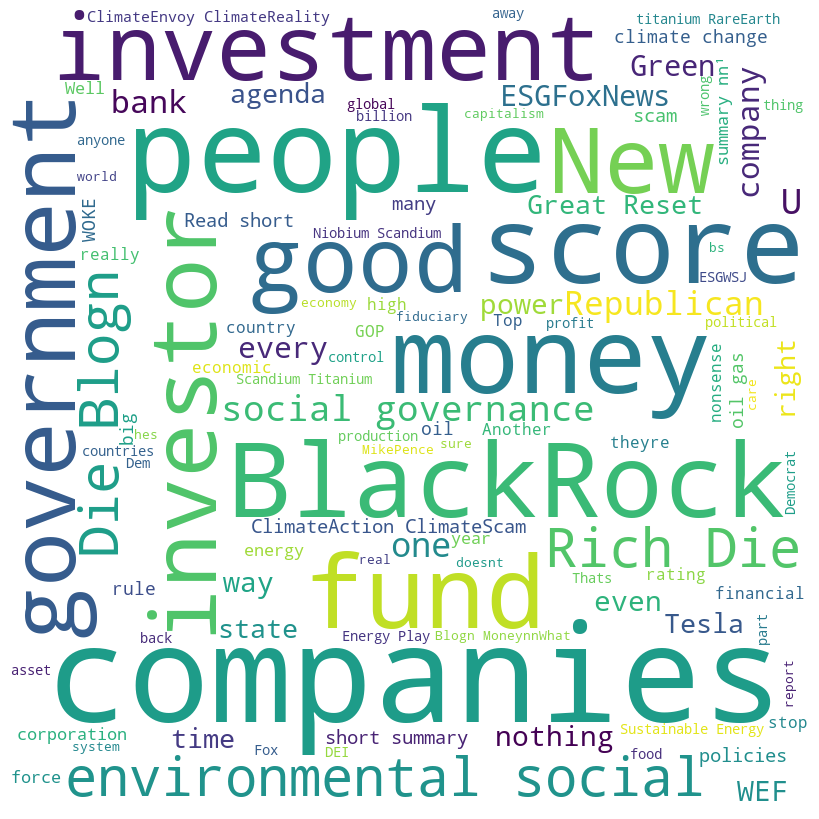

In [118]:
filtered_clean_text1 = ' '.join(filtered_clean_text_token1)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = new_stopwords,
                min_font_size = 10).generate(filtered_clean_text1)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Generating a word cloud for the second token which contains only nouns

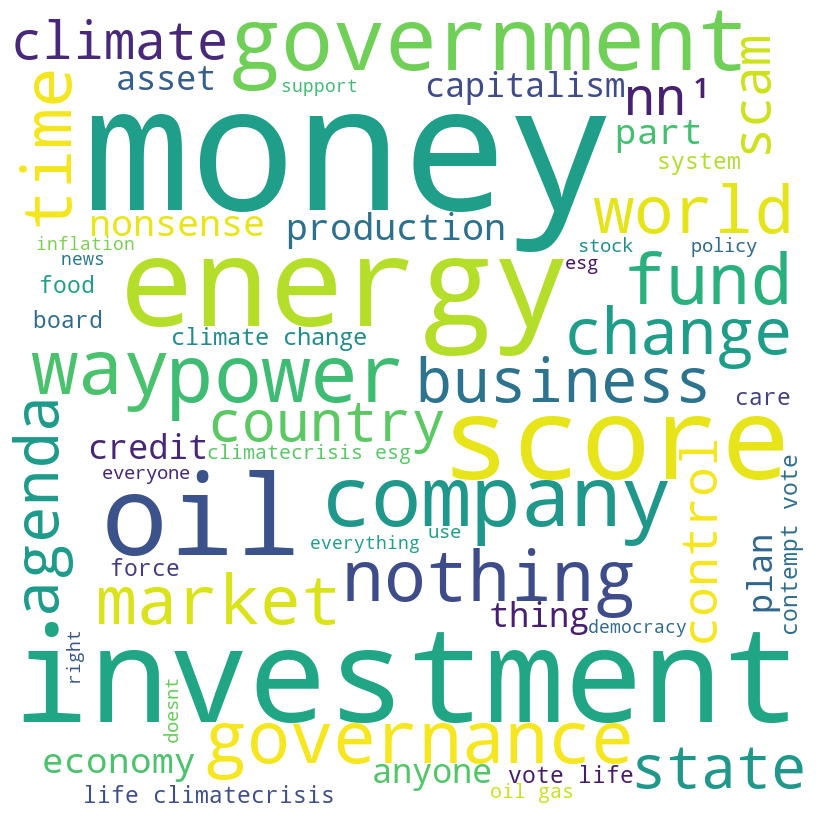

In [119]:
filtered_clean_text2 = ' '.join(filtered_clean_text_token2)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = new_stopwords,
                min_font_size = 10).generate(filtered_clean_text2)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

It can be observed that people often talked about ESG in a **context of finance**, as words like companies, investors, investment, fund, money, market appearing frequently in both tokens. This is in align with the intense discussion and application of ESG in the finance sector.<br><br>
At the same time however, there are also words like **Biden**, **woke**, **score** and **BlackRock** that may connect with ESG in more implicated ways. We will take a closer look of these words in the following parts.<br><br>
_Out of some reasons, the graph doesn't show "Biden" even though it has a very high frequency_

## 4. Topic Modeling with Tomotopy 
_in order to get more comprehensive insights about Twitter posts' topics_

In [120]:
import tomotopy as tp
import seaborn

In [121]:
filtered_clean_text = nltk.Text(filtered_clean_text_token)

In [122]:
num_topics =5
num_topic_words = 5

model = tp.LDAModel(k=num_topics)

for text in filtered_clean_text:
    model.add_doc(text.strip().split())
     
print("Topic Model Training...\n\n")

iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -9.513317508577767
Iteration: 10	Log-likelihood: -9.454815322921062
Iteration: 20	Log-likelihood: -9.45848228399609
Iteration: 30	Log-likelihood: -9.463404790997027
Iteration: 40	Log-likelihood: -9.45943176104083
Iteration: 50	Log-likelihood: -9.451482331575692
Iteration: 60	Log-likelihood: -9.44291713448016
Iteration: 70	Log-likelihood: -9.425560631762696
Iteration: 80	Log-likelihood: -9.426190067085278
Iteration: 90	Log-likelihood: -9.425744158342969

Topic Model Results:


✨Topic 0✨

ESG oil Green change ClimateScam

✨Topic 1✨

companies people Get Die go

✨Topic 2✨

ESG money social score investing

✨Topic 3✨

ESG energy Its Blogn investors

✨Topic 4✨

ESG investment Biden climate ClimateAction



### Multiple topics could be summarized:
### - Scam
### - Investment
### - Governance<br>
_Because tomotopy generate different topics each time, three basic topics are summarized here. In addtion, the topic modeling method doesn't work well on this dataset due to the concise nature of Twitter and overlap of vocabulary._

## 5. Analysis of Twitter Posts Containing Certain Words
_Apart from conducting word frequency analysis of all Twitter texts, this part aims to conduct more detailed analysis including some qualitative interpretations on posts containing intriguing words._

### Tweets containing "Biden"
_"Biden" is considered as an key word because it is closely connected with public policy decision_

In [123]:
tweets_Biden_df = tweets_df[tweets_df['text'].str.contains('Biden')]
tweets_Biden_df

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio,count,total_count,hashtags_list
828,2022-05-01 13:30:17+00:00,TgMacro,Tony Greer,False,@nytimes The Biden/Fink ruling class is attacking energy supply and causing extreme inflation with ESG policy. That is an irrefutable fact.,1,8,0,0,nytimes,Market Analyst • Editor: Morning Navigator • @realvision OG • Cornell Big Red • Chaminade Flyer • navigatorTV https://t.co/yMmmxohxUJ,1,2,NaN
723,2022-06-03 14:42:20+00:00,TEAMServicesNY,BonFire&Ice,False,"@washingtonpost People who understand this unstable egomaniac know that this is all about him sabotaging his own company, being stuck in an absurd Twitter deal he doesn't even want &amp; striking back politically for the being rejected by the ESG community and Biden for lousy governance.\n#TakeMeds",0,4,0,0,washingtonpost,"Business Development, Research & Branding expert who, as a social scientist, now knows more about Americans than I ever hoped to. #MilitantModerate",1,1,NaN
706,2022-06-11 02:16:50+00:00,ConfusedPOLs,Guess Who Is,False,"@washingtonpost USA energy inflation b/c oil prod is 2M barrels/day &lt; Trump’s pre-pandemic levels &amp; &gt; 4M/day &lt; projections past that peak. Biden blocked leases, permits, pipelines, created mass regs that affect all permits, courts block permits, &amp; ESG blocked oil co’s access to capital.",0,1,0,0,washingtonpost,"Nation sovereignty, small government, flat taxes, individual's rights, and state's rights. Set the confused politicians and their followers straight.",1,1,NaN
703,2022-06-11 19:45:18+00:00,ConfusedPOLs,Guess Who Is,False,"@FoxNews USA energy inflation b/c oil prod is 2M barrels/day &lt; Trump’s pre-pandemic levels &amp; &gt; 4M/day &lt; projections past that peak. Biden blocked leases, permits, pipelines, created mass regs that affect all permits, courts block permits, &amp; ESG blocked oil co’s access to capital.",0,1,0,0,FoxNews,"Nation sovereignty, small government, flat taxes, individual's rights, and state's rights. Set the confused politicians and their followers straight.",1,1,NaN
590,2022-07-23 17:39:08+00:00,ACClaw,AcTzu,False,"@nytimes Sad to see NYT degrading to National Inquirer sensationalism to try to retain readers with interest in Ukraine, ESG green, progressive agenda and Biden weaning. https://t.co/YCyKbXuspM",0,1,0,0,nytimes,NaN,1,1,NaN
143,2023-02-01 07:38:53+00:00,argo_times,Argo Times,False,"@FoxNews 🧵1/2 EXCLUSIVE: Every Republican senator and Democrat Joe Manchin are introducing legislation that they hope will terminate the Biden administration's new environment, social and governance (ESG) rule, which they say ""politicizes"" the retirement savings for 152 million",0,1,1,0,FoxNews,📰 News by the People -https://t.co/Spw17zvtNv Create & share news for free. We believe 99% of politicians (left & right) are bad for the American people,1,1,NaN
7,2023-02-28 22:36:01+00:00,ArticleCruncher,kitser,False,"@FoxNews Read short summary here 👇 \n\n¹ The House voted Tuesday to kill the Biden administration's controversial rule. The rule encourages private retirement plan fiduciaries to consider environment, social and governance (ESG) factors when making investment decisions.",0,1,1,0,FoxNews,I'm a AI based 🤖 to summarize for you the long news articles into compact tweets.,1,1,NaN
181,2023-01-09 13:44:50+00:00,AutoEnerge,Auto Energy Man,False,"@WSJ Yes it will prove tough to refill because US gas &amp; oil production is dropping, and subject to drop even more quickly. This falling expected production is due to lack of continued new investment caused by ESG rules imposed by Gary Gensler, Biden appointee.",0,1,0,0,WSJ,"Censorship is violence! Pro school choice. Pro parochial school. NO US troops in Ukraine, EVER, for anything.",1,1,NaN
46,2023-02-24 23:41:37+00:00,ArticleCruncher,kitser,False,"@FoxNews Read short summary here 👇 \n\n¹ House GOP votes next week to kill Biden’s ‘woke’ ESG investing rule. Rule allows private retirement plan fid

In [124]:
Biden_text = tweets_Biden_df['text'].str.cat(sep=' ')
clean_Biden_text = Biden_text.translate(str.maketrans("", "", special_chars))
clean_Biden_tokens = nltk.word_tokenize(clean_Biden_text)
filtered_clean_Biden_token= []
for t in clean_Biden_tokens:
    if t not in stopwords_list:
            filtered_clean_Biden_token.append(t)
Biden_freq_dist = FreqDist(filtered_clean_Biden_token)
Biden_freq_dist.most_common(30) 

[('Biden', 51),
 ('ESG', 44),
 ('permits', 13),
 ('oil', 12),
 ('Gas', 10),
 ('energy', 8),
 ('lt', 8),
 ('blocked', 8),
 ('social', 8),
 ('rule', 8),
 ('woke', 8),
 ('inflation', 7),
 ('Ukraine', 7),
 ('governance', 7),
 ('Bidens', 7),
 ('China', 7),
 ('Bill', 7),
 ('retirement', 6),
 ('plan', 6),
 ('investment', 6),
 ('Hunter', 6),
 ('FBI', 6),
 ('DOJ', 6),
 ('radical', 6),
 ('USA', 5),
 ('mass', 5),
 ('block', 5),
 ('Joe', 5),
 ('new', 5),
 ('environment', 5)]

Biden is mentioned frequently mostly because of the back and forth of his Socially Conscious Investing rule, which Republicans started in March assailing as “woke capitalism” that injected Democratic and liberal values into financial decisions __[(Rogers, 2023)](https://www.nytimes.com/2023/03/20/us/politics/biden-first-veto-esg.html)__.<br><br>
Posts containing Biden mentioned words like oil, gas, energy, inflation, China. Some people expressing concerns on a  lack of investment in gas and oil caused by promotion of ESG concept could undermine USA’s oil and gas production, leading to dependence on _“China’s solar energy”_ and _“Russia and OPEC”_. Some people also relate ESG with future inflation in oil and gas price.

### Tweets containing "woke" 

In [125]:
tweets_Woke_df = tweets_df[tweets_df['text'].str.contains('woke')]
tweets_Woke_df

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio,count,total_count,hashtags_list
127,2023-02-05 05:09:39+00:00,tom_trecker,Tom Trecker,False,@WSJ ESG is a woke scam. The puffed-up ESG scores of Chinese companies (mostly Medium ratings) tell you everything you need to know.,0,12,1,0,WSJ,Journalism is printing what someone else does not want published; everything else is public relations. -George Orwell,1,1,NaN
467,2022-09-07 04:14:42+00:00,SustainablyAli,Ali🌻,False,"@FoxNews They don’t. Not a single person attacking ESG actually understands its structure, they just oppose the principle of it because someone somewhere labeled it as “woke”.",1,7,4,0,FoxNews,let’s plant some trees & save some bees,1,2,NaN
20,2023-02-28 00:17:37+00:00,jamesncebu007,James,False,@WSJ @WSJopinion Good because ESG is woke 🗑,0,5,0,0,WSJ,"Americano, island hopper, globe trotter...",1,1,NaN
138,2023-02-02 12:23:37+00:00,Terrista2,AntiSocialMedia,False,@FoxNews “Experts previously told Fox News Digital that ESG is often difficult to fully define because it's dependent on personal interpretation.”\n\nExactly like your definition of “woke” 🤣,0,5,1,0,FoxNews,"Deradicalize the GOP. Antifascist, anti-authoritarian. Do you even know where your thoughts come from? No, merci. “Anyhow, welcome to hell. This was your idea.”",1,1,NaN
446,2022-09-13 04:48:19+00:00,NorthTexasClean,Bread Maker,False,@FoxNews As an investor I won't invest in companies that prioritize or put major emphasis on ESG. They're breaching their fiduciary duty. Go woke go broke,0,2,0,0,FoxNews,"American Businessman, Investor,\nAnti CBDC",1,1,NaN
382,2022-10-11 13:32:48+00:00,rhonda_harbison,Rhonda Harbison,False,@FoxNews LMAO\nhttps://t.co/zTFZgrRlp1\nWhat are ESG and 'woke capitalism'? State treasurers weigh in on fight ... https://t.co/Cgd5ghNTz7,1,1,0,0,FoxNews,"Fighting for Democracy, WOCN RN, BSN, J.D.",1,2,NaN
272,2022-11-28 12:15:51+00:00,_DougRoberts,Doug Roberts 🇺🇸,False,"@WSJ Disney sees loses?\n1) How many times will stock holders allow their ownership to be impoverished\n2) while corporate officers repeat the same folly?\n3) Get woke. Go broke.\n4) NO ESG, NO WOKE\n5) Give the paying customers what they want.",0,1,0,0,WSJ,Christian perspective tweets.\n1) Islamic deity is not the Christian Diety so Islam breaks the 1st Cmnd and is blasphemy to Jesus.\n2) Islam is unconstitutional.,1,1,NaN
878,2022-03-09 23:25:28+00:00,DaveRothwell8,Dave Rothwell,False,"@WSJ ESG has handcuffed the oil companies in North America, get ready to pay woke people. Lol",0,1,0,0,WSJ,"Here to give my opinion, like it or not? Cdn O&G investor",1,1,NaN
423,2022-09-23 06:54:02+00:00,WhyUToo,Howard Gold,False,"@FoxNews @IngrahamAngle Makes me want to close all my accounts with these banks. Since they don’t protect my rights, I will no longer let them use my money and abuse my privacy and invest in the woke ESG agenda and government intrusion on the constitutional rights of Americans.",1,1,0,1,FoxNews,"Husband to Gloria, father of 3, grandfather of 2, Born again Christian who loves the Lord. Chaplain Dir of Inland Empire Crisis Response. #TwitterPhilanthropy",1,3,NaN
614,2022-07-16 14:16:15+00:00,TrumpUndead,"Joe ""Balloon Man"" Biden☠️🇺🇸",False,"@WSJ I can tell you now with absolute certainty, if Gap dumped ESG and openly went anti-woke they would rescue their company. Normal people (i.e. the vast majority of Americans) would flock to their stores.",0,1,0,0,WSJ,I hate half the country...I despise the other half. Pronouns cranberry/vodka,1,1,NaN


In [126]:
Woke_text = tweets_Woke_df['text'].str.cat(sep=' ')
clean_Woke_text = Woke_text.translate(str.maketrans("", "", special_chars))
clean_Woke_tokens = nltk.word_tokenize(clean_Woke_text)
filtered_clean_Woke_token= []
for t in clean_Woke_tokens:
    if t not in stopwords_list:
            filtered_clean_Woke_token.append(t)
Woke_freq_dist = FreqDist(filtered_clean_Woke_token)
Woke_freq_dist.most_common(30)

[('woke', 39),
 ('ESG', 37),
 ('investing', 8),
 ('companies', 7),
 ('broke', 6),
 ('Biden', 6),
 ('pushing', 5),
 ('Go', 4),
 ('go', 4),
 ('How', 4),
 ('get', 4),
 ('back', 4),
 ('energy', 4),
 ('They', 3),
 ('Fox', 3),
 ('banks', 3),
 ('use', 3),
 ('money', 3),
 ('company', 3),
 ('one', 3),
 ('esg', 3),
 ('going', 3),
 ('Read', 3),
 ('short', 3),
 ('summary', 3),
 ('👇', 3),
 ('nn¹', 3),
 ('GOP', 3),
 ('Bidens', 3),
 ('‘', 3)]

According to __[urban dictionary](https://www.urbandictionary.com/define.php?term=Woke)__, woke initially describes an individual becomeing more aware of the social injustice, or current affairs relating to bias, discrimination, or double-standards. However, **it is currently used to term hypocrites** who think they are 'enlightened' despite the fact that they are encaged in echo-chamber and extremely close-minded.<br><br>
When mentioning "woke", some people are criticizing the general concept of ESG, and some other are using it to attack Biden’s ESG rule. One example of terming ESG as a woke is to frame it as a coercion by finance industry, _“ESG is an attempt by the banks to govern us through coercion int their idea of what is right and should be illegal”_.<br><br>
In contrast, there are some people defending for ESG while belittling the usage of “woke’, commenting other people using the term as _“pathetic”_ and _“like a petulant child”_.

### Dispersion plot of "Biden" and "woke"
_in order to better illustrate the overlap of "Biden" and "woke", the twitter texts is firstly sorted in time order_

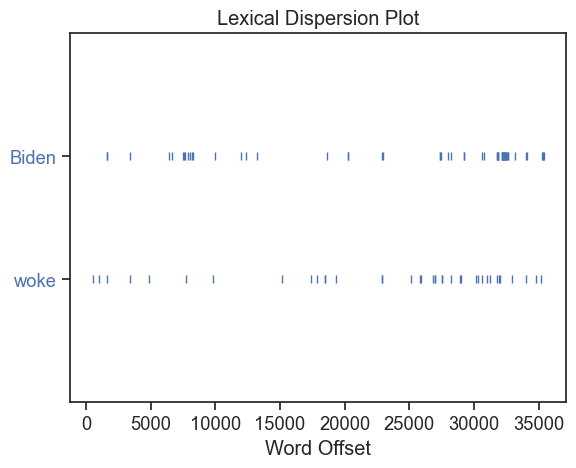

In [127]:
time_text_df = text_df.sort_values(by='date', ascending=True)
time_text = ''.join(time_text_df['text'].tolist())
time_text_tokens = nltk.word_tokenize(time_text)
time_text_obj = nltk.Text(time_text_tokens)
time_text_obj.dispersion_plot(['Biden','woke'])

### Tweets containing "score" 

In [128]:
tweets_Score_df = tweets_df[tweets_df['text'].str.contains('score')]
tweets_Score_df 
Score_text = tweets_Score_df['text'].str.cat(sep=' ')
clean_Score_text = Score_text.translate(str.maketrans("", "", special_chars))
clean_Score_tokens = nltk.word_tokenize(clean_Score_text)
filtered_clean_Score_token= []
for t in clean_Score_tokens:
    if t not in stopwords_list:
            filtered_clean_Score_token.append(t)
Score_freq_dist = FreqDist(filtered_clean_Score_token)
Score_freq_dist.most_common(30)

[('ESG', 89),
 ('score', 49),
 ('scores', 35),
 ('social', 9),
 ('go', 7),
 ('companies', 6),
 ('credit', 6),
 ('high', 6),
 ('one', 5),
 ('esg', 5),
 ('Sri', 5),
 ('Lanka', 5),
 ('going', 5),
 ('scam', 4),
 ('carbon', 4),
 ('Democrats', 4),
 ('get', 4),
 ('government', 4),
 ('food', 4),
 ('WEF', 4),
 ('gon', 4),
 ('na', 4),
 ('trying', 4),
 ('98', 4),
 ('Tesla', 3),
 ('Teslas', 3),
 ('business', 3),
 ('FTX', 3),
 ('But', 3),
 ('performance', 3)]

The "score" people were mentioning is ESG score by rating companies and investment banks.<br><br>
When talking about ESG score, people are mostly criticizing certain companies for **green-washing** or puffing up the firm’s ESG rating. People also despise ESG as superficial and manipulatable scores that create speculation opportunities for companies to gain finance while **generating no effective motivation for firms to conduct in a more society-conscious way**.

### Tweets containing "BlackRock" 
_"BlackRock" is taken as an important word because it's the only company name appearing among the 50 most frequent words_

In [129]:
tweets_BlackRock_df = tweets_df[tweets_df['text'].str.contains('BlackRock')]
tweets_BlackRock_df
BlackRock_text = tweets_BlackRock_df['text'].str.cat(sep=' ')
clean_BlackRock_text = BlackRock_text.translate(str.maketrans("", "", special_chars))
clean_BlackRock_tokens = nltk.word_tokenize(clean_BlackRock_text)
filtered_clean_BlackRock_token= []
for t in clean_BlackRock_tokens:
    if t not in stopwords_list:
            filtered_clean_BlackRock_token.append(t)
BlackRock_freq_dist = FreqDist(filtered_clean_BlackRock_token)
BlackRock_freq_dist.most_common(30)

[('BlackRock', 24),
 ('ESG', 22),
 ('investors', 8),
 ('big', 7),
 ('investing', 6),
 ('corpgov', 6),
 ('billion', 5),
 ('Vanguard', 5),
 ('money', 5),
 ('GOP', 4),
 ('shares', 4),
 ('passive', 4),
 ('vote', 4),
 ('🧵12', 4),
 ('Is', 3),
 ('energy', 3),
 ('assets', 3),
 ('states', 3),
 ('state', 3),
 ('banks', 3),
 ('BlackRocks', 3),
 ('Fox', 3),
 ('asset', 3),
 ('managers', 3),
 ('companies', 3),
 ('buy', 3),
 ('funds', 2),
 ('Florida', 2),
 ('joined', 2),
 ('growing', 2)]

Generally, twitter users were attacking BlackRock and its CEO Larry Fink for "weaponizing" retirement funds with its push for more ESG investments, which promote environmental, social and governance responsibility __[(Treene, 2022)](https://www.axios.com/2022/08/18/blackrock-esg-conservatives)__.<br><br>
For instance, Senate Republicans Tom Cotton, Marsha Blackburn and Marco Rubio planned to use their congressional oversight powers _"to scrutinize the institutionalized antitrust violations being committed in the name of ESG"_ __[(Thomas, 2022)](https://www.reuters.com/legal/government/senate-republicans-warn-us-law-firms-over-esg-advice-2022-11-04/)__.It is also reported by Financial Times that chief executives from Goldman Sachs and Meta have been _"pressed by conservative shareholder groups over their charitable donations or racial equity policies"_ among which one group, the Free Enterprise Project, says they were saving corporate America from _“the socialist foundations of woke”_ __[(Johnson, 2022)](https://www.ft.com/content/e4a818e5-4039-46d9-abe0-b703f33d0f9b)__.

## 6. Sentiment Analysis on Twitter Texts

### Import SentimentIntensityAnalyzer and define a function to get sentiment scores of input texts

In [130]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()
pd.options.display.max_colwidth = 400

In [131]:
def calculate_sentiment(text):
    scores = sentimentAnalyser.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [132]:
tweets_df['sentiment_score'] = tweets_df['text'].apply(calculate_sentiment)
tweets_df.sort_values(by='sentiment_score', ascending=False)[:10]

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio,count,total_count,hashtags_list,sentiment_score
182,2023-01-08 16:34:00+00:00,46suxcamelballs,UltraMegaMagaMom,False,"@washingtonpost Congratulations KBJ you got an esg job 😂😂😂😂😂 you should be proud 😂😂😂. Try earning it, you’ll get more respect rather the butt of a Biden Woke Nomination Joke 🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮",0,0,0,0,washingtonpost,"I am 100% A PATRIOT, and a WOMAN! I am a PROUD 3X blue star mom! FAMILY FAITH & COUNTRY NO DM PLEASE",1,1,NaN,0.9870
844,2022-04-20 02:08:48+00:00,NwoSpotter,nwo.spotter,False,"@WSJ We are thankful for the corporate oligarchs caring for our health. Thank you for caring. Blackrock, Berkshire Hathaway, Vanguard, and everybody supporting ESG investments loves you. The corporations love you. The government loves you.",0,0,0,0,WSJ,The New World Order is already here.,1,1,NaN,0.9801
410,2022-09-27 21:47:08+00:00,TstMgomes,Marcio Gomes,False,@FoxNews Good bye ESG 🤣🤣🤣🤣🤣,0,1,0,0,FoxNews,Nada no mundo é mais pentelho do que uma mente sem foco cheia de opiniões formadas,1,1,NaN,0.9578
745,2022-05-28 14:37:39+00:00,polarice1984,Polarice1984,False,@WSJ @WSJopinion ESG is a valueless layer of social justice imperatives used to shame capitalists. It redirects profit to virtue signaling endeavors. Companies should be free to choose their community support activities without fear of demonization by self appointed arbiters of social justice.,1,2,1,0,WSJ,"Leftist hippie in 60s, believed the rhetoric. But Churchill was right. Rely on yourself and your abilities. I have a past but I don't live there anymore.",1,2,NaN,0.9519
470,2022-09-07 04:11:34+00:00,Jagster20548365,Jeff Jagster,False,@FoxNews “Cronie” capitalism = ESG. Pay for favors. Only helps the companies already at the top. Rich get richer. True capitalism is better.,0,1,0,0,FoxNews,Media and climate skeptic who thinks Government is not the answer and more taxes just leads to more government.,1,1,NaN,0.9493
737,2022-05-30 17:13:20+00:00,appaloosa62,Kurt Rossbach,False,"@WSJ @StephenWilmot Tesla is a wildly successful and profitable company that has given amazing financial opportunities to thousands far, far, beyond some squeaky WSJ commentator’s observations from the sidelines. Started a company lately Stephen?Are you an ESG extremist?",0,0,0,0,WSJ,God Bless America. May She be a light unto the Nations forever. Never forget the sacrifices of all who have defended Her from Her enemies.,1,1,NaN,0.9254
752,2022-05-28 03:34:45+00:00,maddoghasfleas,David Lang,False,"@WSJ @WSJopinion @Mike_Pence Oh sure, the rapacious free market system should be unfettered to do its best to run amok in the name of profit at any price. \nESG is a communist plot by Beijing to cripple American capitalism. \nBesides corporations are people too.",0,0,0,0,WSJ,"what I think about: climate change, liberal democracy, inequality, people vs cars, living in the city, failure of capitalism, animal rights, baking apple pies",1,1,NaN,0.9136
728,2022-06-02 14:59:57+00:00,HarrisOly,Mel Harris,False,@FoxNews I'd rather be a patriotic nationalist than an EWF (great reset) or an ESG globalist any day. If you din't know what those abbreviations are then you better start researching.\n\nYou will own nothing and you WILL BE HAPPY. Because you are a peon.,0,0,0,0,FoxNews,NaN,1,1,NaN,0.9087
170,2023-01-17 23:57:05+00:00,TannerBoyle15,.,False,@washingtonpost .... didn’t see it coming 🤣😂🤣😂 #ESG #ClimateAction #ClimateScam,0,0,0,0,washingtonpost,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!,1,1,ClimateAction,0.9042
170,2023-01-17 23:57:05+00:00,TannerBoyle15,.,False,@washingtonpost .... didn’t see it coming 🤣😂🤣😂 #ESG #ClimateAction #ClimateScam,0,0,0,0,washingtonpost,Change the Narrative. Questioning the Subjective Matter Experts. Please no followers!,1,1,ESG,0.9042


### Distribution of sentiment scores using mean, median, quartile and standard deviation function of Pandas

In [133]:
#The folloing codes are adapted from pypandas.org "How to calculate summary statistics": https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
sent_mean = tweets_df['sentiment_score'].mean()
sent_median = tweets_df['sentiment_score'].median()
sent_q1 = tweets_df['sentiment_score'].quantile(0.25)
sent_q3 = tweets_df['sentiment_score'].quantile(0.75)
sent_std = tweets_df['sentiment_score'].std()
print(sent_mean)
print(sent_median)
print(sent_q1)
print(sent_q3)
print(sent_std)

-0.054746496212121305
0.0
-0.4939
0.3612
0.504441093359944


Distribution of sentiment scores:<br>
- The mean of all tweets is around **-0.055**, indicating an **overall negative sentiment** of all tweets.
- Median is **0.0**, indicating a **left-skewed** distribution combined with a negative mean. This means negative tweets have relatively **more extreme** sentiments than positive ones.
- The first quartile is **-0.4939**, and third quartile is **0.3612**, indicating the middle 50% of tweets got a relatively negative sentiment.
- Standard deviation is around **0.50**, indicating the sentiment **varies hugely** from tweets.
- In general, the data possesses a relatively negative sentiment surrounding ESG topic.

### Extract tweets with negative sentiment score

In [134]:
negative_tweets_df = tweets_df[tweets_df['sentiment_score'] < 0]
negative_tweets_df.sort_values(by='sentiment_score', ascending=True)[0:50]

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio,count,total_count,hashtags_list,sentiment_score
189,2023-01-04 10:42:53+00:00,GeneralRenegade,General Renegade,False,"@FoxNews California, will go broke for going on this ideocracy ideologicals of bull shit woke ESG or wtf ever they the Cali DIP SHIT DNC bull crap of more bull crap! They are forcing shit no one wants and or ever needs ever! \nThese morons are ideots! This shit, needs to stop now!",0,0,0,0,FoxNews,"OWNER OF BOEING, GOOGLE, FACEBOOK, APPLE, Capital Records, Activision Pub Co., MICROSOFT & more!!",1,1,NaN,-0.9880
32,2023-02-27 12:45:41+00:00,bigbenhenderson,BIG BEN HENDERSON - FLORIDA MAN!,False,@WSJ And the DIE DIE DIE Programs pushed by PIECE OF SHIT Glogbalist ESG Con Artists. FUCK THEM. They are Anti-American,0,0,0,0,WSJ,"Risk Taker, Trouble Maker, Cold Beer Lover and Natural Born Florida Man! #FloridaMan #Newz #FastCars #UFC #FLManBeer",1,1,NaN,-0.9763
342,2022-11-05 20:20:54+00:00,WisemnstlseekHm,S Butler,False,"@nytimes @IlhanMN Home Heat, Gas double+, Crime, DA's free violent, overrun Border, shortages, food prices, speech oppression, IRS, Afghanistan, Ukraine, violent left ok'd, democracy loss, ESG, election ?'s, 50% of Americans attacked, covid abuse, FBI, CRT, damaging children, Want more of it 11/8?",0,0,0,0,nytimes,NaN,1,1,NaN,-0.9700
334,2022-11-08 19:15:24+00:00,WisemnstlseekHm,S Butler,False,"@WSJ Home Heat, Gas double+, Crime, DA's free violent, overrun Border, shortages, food prices, speech oppression, IRS, Afghanistan, Ukraine, violent left ok'd, democracy loss, ESG, election ?'s, 50% of Americans attacked, covid abuse, FBI, CRT, damaging children, Want more of it 11/8?",0,0,0,0,WSJ,NaN,1,1,NaN,-0.9700
589,2022-07-23 18:40:00+00:00,Callicarpa4evR,*A♟formerly 🆓 human🗽 #LGBFireJB+🖖🐊🍊🇺🇸✝️,False,"@nytimes WTF is wrong with your editors? Are you all daft? Seriously…WHAT is wrong with your “news” agency/paper???? Dumb, foolish and yet dangerous. Is that the point? Soylent green new deal? Go ESG yourself.",0,0,0,0,nytimes,#MolonLabe #science #ConstitutionalConservative #BlueLivesMatter Retweets ≠ agreement 🚫virtue signaling 🇺🇸 #Freedom pronouns USA/USA/USA,1,1,NaN,-0.9647
412,2022-09-27 18:24:22+00:00,WisemnstlseekHm,S Butler,False,"@FoxNews Home Heat, Gas double+, Crime, DA's free violent, overrun Border, shortages, Prices, Coming food shortages, IRS, Afghanistan, Ukraine, violent left ok'd, liberty loss, ESG, election ?'s, 50% of Americans attacked, covid abuse, FBI, CRT, damaging children, Want more of it in Nov?",0,0,0,0,FoxNews,NaN,1,1,NaN,-0.9621
411,2022-09-27 18:29:58+00:00,WisemnstlseekHm,S Butler,False,"@FoxNews Home Heat, Gas double+, Crime, DA's free violent, overrun Border, shortages, Prices, Coming food shortages, IRS, Afghanistan, Ukraine, violent left ok'd, liberty loss, ESG, election ?'s, 50% of Americans attacked, covid abuse, FBI, CRT, damaging children, Want more of it in Nov?",0,0,0,0,FoxNews,NaN,1,1,NaN,-0.9621
666,2022-06-30 15:04:32+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@cnnbrk This is SO fucked up! And outrageous. But sadly, expected. The conservative #SCOTUS judges have blood on their hands. Democrats need to take the gloves off NOW and fight against this shit. Our lives literally depend on it. #failedstate #scotus #EPA #ESG #Climate #climatecrisis",1,5,1,1,cnnbrk,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,SCOTUS,-0.9587
666,2022-06-30 15:04:32+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@cnnbrk This is SO fucked up! And outrageous. But sadly, expected. The conservative #SCOTUS judges have blood on their hands. Democrats need to take the gloves off NOW and fight against this shit. Our lives literally depend on it. #failedstate #scotus #EPA #ESG #Climate #climatecrisis",1,5,1,1,cnnbrk,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG A

### Conduct word frequecy analysis on negative tweets using FreqDist

In [135]:
negative_text = negative_tweets_df['text'].str.cat(sep=' ')
clean_negative_text = negative_text.translate(str.maketrans("", "", special_chars))
clean_negative_tokens = nltk.word_tokenize(clean_negative_text)
filtered_clean_negative_token= []
for t in clean_negative_tokens:
    if t not in stopwords_list:
            filtered_clean_negative_token.append(t)
negative_freq_dist = FreqDist(filtered_clean_negative_token)
negative_freq_dist.most_common(30)

[('ESG', 475),
 ('Biden', 40),
 ('companies', 39),
 ('scam', 34),
 ('Get', 34),
 ('oil', 32),
 ('Rich', 31),
 ('Die', 31),
 ('Blogn', 31),
 ('climate', 28),
 ('money', 27),
 ('esg', 25),
 ('energy', 24),
 ('people', 24),
 ('woke', 22),
 ('ArcherVentures', 22),
 ('score', 21),
 ('US', 21),
 ('green', 20),
 ('investment', 19),
 ('stop', 18),
 ('policies', 18),
 ('social', 18),
 ('w', 18),
 ('climatecrisis', 17),
 ('think', 17),
 ('life', 16),
 ('investing', 16),
 ('DisinformationGovernanceBoard', 16),
 ('start', 16)]

Negative tweets frequently mentioned **Biden, companies, scam, woke**, and so on. It can be inferred that people expressed relatively strong negative attitudes when talking about **Biden’s ESG rule** and criticizing **green-washing** activities of companies. <br><br>In addition, tweets with extremely negative scores use a lot of bad words including “bull shit” and "fucked up" to express hatred and anger straightforward.

### Extract tweets with positive sentiment score and conduct word frequency analysis

In [136]:
positive_tweets_df = tweets_df[tweets_df['sentiment_score'] > 0]
positive_tweets_df.sort_values(by='sentiment_score', ascending=False)[0:50]
positive_text = positive_tweets_df['text'].str.cat(sep=' ')
clean_positive_text = positive_text.translate(str.maketrans("", "", special_chars))
clean_positive_tokens = nltk.word_tokenize(clean_positive_text)
filtered_clean_positive_token= []
for t in clean_positive_tokens:
    if t not in stopwords_list:
            filtered_clean_positive_token.append(t)
positive_freq_dist = FreqDist(filtered_clean_positive_token)
positive_freq_dist.most_common(30)

[('ESG', 374),
 ('companies', 31),
 ('investment', 31),
 ('investing', 30),
 ('people', 29),
 ('ClimateAction', 29),
 ('Green', 24),
 ('social', 24),
 ('ClimateScam', 24),
 ('money', 22),
 ('energy', 21),
 ('get', 20),
 ('Great', 20),
 ('scores', 20),
 ('going', 20),
 ('New', 18),
 ('Its', 17),
 ('investors', 17),
 ('change', 16),
 ('ClimateEnvoy', 16),
 ('Energy', 16),
 ('back', 15),
 ('would', 15),
 ('market', 15),
 ('us', 15),
 ('Order', 15),
 ('right', 15),
 ('new', 15),
 ('BlackRock', 14),
 ('score', 14)]

It is noticeable that the SentimentIntensityAnalyzer performed much worse in analyzing Tweets with positive sentiments. A large number of posts with highest sentiment scores are sarcasm, usage of 🤣 and emojis is misjudged as positive signal while people were using it as symbols of sneering.<br><br>
Another import finding is that even posts supporting ESG also consists of large amount of negative words. For example, Ioannis Ioannou __[@iioannoulbs](https://twitter.com/iioannoulbs)__, who is a professor in __[London Business School](https://www.london.edu/faculty-and-research/faculty-profiles/i/ioannou-i)__ also used harsh words like “moron” and “fucked up” in his posts.

In [137]:
tweets_df[tweets_df['username'].str.contains('iioannoulbs')]

,date,username,name,verified,text,retweets,likes,replies,quotes,reply_to,user_bio,count,total_count,hashtags_list,sentiment_score
620,2022-07-15 03:02:05+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@nytimes History will be unkind and harsh towards morons like @Sen_JoeManchin Future generations will rightly remember him with disdain and contempt. In the #MidTerms2022 vote as if your life depends on it, because it does! #climate #climatecrisis #esg #green",2,9,1,0,nytimes,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,MidTerms2022,-0.9098
620,2022-07-15 03:02:05+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@nytimes History will be unkind and harsh towards morons like @Sen_JoeManchin Future generations will rightly remember him with disdain and contempt. In the #MidTerms2022 vote as if your life depends on it, because it does! #climate #climatecrisis #esg #green",2,9,1,0,nytimes,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,climate,-0.9098
620,2022-07-15 03:02:05+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@nytimes History will be unkind and harsh towards morons like @Sen_JoeManchin Future generations will rightly remember him with disdain and contempt. In the #MidTerms2022 vote as if your life depends on it, because it does! #climate #climatecrisis #esg #green",2,9,1,0,nytimes,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,climatecrisis,-0.9098
620,2022-07-15 03:02:05+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@nytimes History will be unkind and harsh towards morons like @Sen_JoeManchin Future generations will rightly remember him with disdain and contempt. In the #MidTerms2022 vote as if your life depends on it, because it does! #climate #climatecrisis #esg #green",2,9,1,0,nytimes,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,esg,-0.9098
620,2022-07-15 03:02:05+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@nytimes History will be unkind and harsh towards morons like @Sen_JoeManchin Future generations will rightly remember him with disdain and contempt. In the #MidTerms2022 vote as if your life depends on it, because it does! #climate #climatecrisis #esg #green",2,9,1,0,nytimes,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,green,-0.9098
666,2022-06-30 15:04:32+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@cnnbrk This is SO fucked up! And outrageous. But sadly, expected. The conservative #SCOTUS judges have blood on their hands. Democrats need to take the gloves off NOW and fight against this shit. Our lives literally depend on it. #failedstate #scotus #EPA #ESG #Climate #climatecrisis",1,5,1,1,cnnbrk,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,SCOTUS,-0.9587
666,2022-06-30 15:04:32+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@cnnbrk This is SO fucked up! And outrageous. But sadly, expected. The conservative #SCOTUS judges have blood on their hands. Democrats need to take the gloves off NOW and fight against this shit. Our lives literally depend on it. #failedstate #scotus #EPA #ESG #Climate #climatecrisis",1,5,1,1,cnnbrk,Prof @LBS | Keynote Speaker on #Sustainability Leadership & Corporate Responsibility 💚 | #ESG Advisory Board | Own views | Can get political 🏳‍🌈 | #woke |,1,3,failedstate,-0.9587
666,2022-06-30 15:04:32+00:00,iioannoulbs,Ioannis Ioannou 🇪🇺,True,"@cnnbrk This is SO fucked up! And outrageous. But sadly, expected. The conservative #SCOTUS judges have blood on

## 7. Who Are Tweeting? A Look into User Bios

### Operate on a new DataFrame to analyze user biographies, and get user biographies of 30 tweets with highest retweets plus quotes

In [138]:
bio_df = tweets_df[['date', 'username', 'name', 'verified', 'total_count','user_bio','sentiment_score']]
bio_df.sort_values(by='total_count', ascending=False)[:30]

,date,username,name,verified,total_count,user_bio,sentiment_score
204,2022-12-21 12:06:52+00:00,EntArchDude,Structure is Fate,False,24,"BSEE, MS Eng Mgmt, CISSP, ISSAP, FEAF Black belt, DoDAF Black belt, TOGAF, SABSA, 40+ years, Comparative Religion (hobby), INTJ, ACOA, Adopted, Veteran...",0.2732
709,2022-06-10 23:48:59+00:00,ZachWinnerCRE,Zach Winner,False,21,Providing Multifamily Investment Opportunities | Receive Ongoing Cash-Flow | Build Long-Term Wealth | Significant Tax Benefits | Minimum Investment $50K,0.2732
705,2022-06-11 03:05:06+00:00,2Bjeromemichael,JeromeMichael (master generalist),False,7,Author ~ Artist ~ Sovereign Individual ~ Critical Thinker ~ Skeptical Optimist ~ Freedom Fighter ~ “Change your mind. Change yourself. Change the world.”,0.8910
510,2022-08-18 19:47:37+00:00,wardiamonds,Wardiamonds,False,5,"Israeli cut & polished blood diamonds fund unregulated nukes, apartheid & war crimes are NOT banned by Kimberley Process are labelled conflict-free.",-0.4404
510,2022-08-18 19:47:37+00:00,wardiamonds,Wardiamonds,False,5,"Israeli cut & polished blood diamonds fund unregulated nukes, apartheid & war crimes are NOT banned by Kimberley Process are labelled conflict-free.",-0.4404
276,2022-11-27 14:48:14+00:00,CyberSecurity__,cybersecurity,False,5,"cybersecurity, devsecops, orchestration, and ML.\n\nand sh*tposter, apparently.",0.7906
510,2022-08-18 19:47:37+00:00,wardiamonds,Wardiamonds,False,5,"Israeli cut & polished blood diamonds fund unregulated nukes, apartheid & war crimes are NOT banned by Kimberley Process are labelled conflict-free.",-0.4404
862,2022-03-31 01:05:58+00:00,st56344035,Scott Stein,False,4,"Husband and Dad of two amazing girls. Love the outdoors, endurance sports and great book. Foodie",0.1280
348,2022-11-03 16:10:50+00:00,AnjosEstherdos,EstherdosAnjos,False,4,"Pai, afasta de mim este CALE-SE. 🇧🇷🇧🇷🇧🇷",-0.4404
322,2022-11-12 15:56:45+00:00,c_salem2,Christian Salem,False,4,Co-Founder of @ConsensusNLP. Giving science back to the people.\n\nFormer Product at @NFL and @ticketmanager. Holder of the Century @nufbfamily,-0.1280


### Conduct word frequency analysis on user biographies of top tweets

In [139]:
top_bio_df = bio_df.sort_values(by='total_count', ascending=False)[:30]
bio_text = top_bio_df['user_bio'].str.cat(sep=' ')
clean_bio_text = bio_text.translate(str.maketrans("", "", special_chars))
clean_bio_tokens = nltk.word_tokenize(clean_bio_text)
filtered_clean_bio_token= []
for t in clean_bio_tokens:
    if t not in stopwords_list:
            filtered_clean_bio_token.append(t)
bio_freq_dist = FreqDist(filtered_clean_bio_token)
bio_freq_dist.most_common(15)

[('Change', 10),
 ('Narrative', 7),
 ('Questioning', 7),
 ('Subjective', 7),
 ('Matter', 7),
 ('Experts', 7),
 ('Please', 7),
 ('followers', 7),
 ('Prof', 6),
 ('LBS', 6),
 ('Keynote', 6),
 ('Speaker', 6),
 ('Sustainability', 6),
 ('Leadership', 6),
 ('Corporate', 6)]

It is noticeable the most popular tweets were posted by users who stresses their **expertise in related field, labeling themselves as sophisticated practitioners and proclaim a position of critical thinking**.

### Extract user biographies of negative tweets and conduct word frequency analysis

In [140]:
neg_bio_df = bio_df[bio_df['sentiment_score'] < 0]
neg_bio_df 

,date,username,name,verified,total_count,user_bio,sentiment_score
123,2023-02-05 16:34:48+00:00,ljj58,Len Jardine,False,1,"Husband, (Grand)Father, Citizen/ Never give up your Liberty for Safety",-0.3400
34,2023-02-27 12:39:21+00:00,peaknonsense593,Peak Nonsense,False,1,NaN,-0.2263
544,2022-08-05 15:16:25+00:00,GamerguyParker,Parker,False,1,Twitter is for shit posting.,-0.4588
711,2022-06-10 21:27:12+00:00,kanyeforPM,Buy A Dip,False,1,liberty,-0.6115
795,2022-05-18 22:09:05+00:00,JoshGnu,JoshGnu,False,2,#ClimateActionNow 🌎 Battlefield vet #M4A #Nature #Safari #InjuredForever 💚🐘💙 ✊ Dulce bellum inexpertis,-0.8779
...,...,...,...,...,...,...,...
178,2023-01-11 12:10:59+00:00,DowhatISayItsg1,Do what I Say It's good for you,False,1,Crusader for retail,-0.4019
461,2022-09-07 05:15:17+00:00,nico2121la,Nico,False,1,"independent & commons sense minded, socialism & communism enslaves people, freedom is everyone’s right & it’s worth fighting for, never let them take it away",-0.1779
462,2022-09-07 05:10:18+00:00,jhaugan,Grampa of Canadia,False,1,Grandfather. Pastor. Lover of God's design in life and nature.\n\nBelief/faith must be based on evidence.,-0.8860
465,2022-09-07 04:22:38+00:00,Americanwinn,➡️Reality Check 🪬,False,1,Mother Nature is just fine. Earn moral virtue. ✝ Keep your sense of humor and unique perspectives.🔔,-0.5122


In [141]:
neg_bio_df = neg_bio_df.sort_values(by='total_count', ascending=False)[:30]
neg_bio_text = neg_bio_df['user_bio'].str.cat(sep=' ')
clean_neg_bio_text = neg_bio_text.translate(str.maketrans("", "", special_chars))
clean_neg_bio_tokens = nltk.word_tokenize(clean_neg_bio_text)
filtered_clean_neg_bio_token= []
for t in clean_neg_bio_tokens:
    if t not in stopwords_list:
            filtered_clean_neg_bio_token.append(t)
neg_bio_freq_dist = FreqDist(filtered_clean_neg_bio_token)
neg_bio_freq_dist.most_common(15)

[('Prof', 12),
 ('LBS', 12),
 ('Keynote', 12),
 ('Speaker', 12),
 ('Sustainability', 12),
 ('Leadership', 12),
 ('Corporate', 12),
 ('Responsibility', 12),
 ('💚', 12),
 ('ESG', 12),
 ('Advisory', 12),
 ('Board', 12),
 ('Own', 12),
 ('views', 12),
 ('Can', 12)]

### Extract user biographies of positive tweets and conduct word frequency analysis

In [142]:
pos_bio_df = bio_df[bio_df['sentiment_score'] > 0]
pos_bio_df 
pos_bio_df = pos_bio_df.sort_values(by='total_count', ascending=False)[:30]
pos_bio_text = pos_bio_df['user_bio'].str.cat(sep=' ')
clean_pos_bio_text = pos_bio_text.translate(str.maketrans("", "", special_chars))
clean_pos_bio_tokens = nltk.word_tokenize(clean_pos_bio_text)
filtered_clean_pos_bio_token= []
for t in clean_pos_bio_tokens:
    if t not in stopwords_list:
            filtered_clean_pos_bio_token.append(t)
pos_bio_freq_dist = FreqDist(filtered_clean_pos_bio_token)
pos_bio_freq_dist.most_common(15)

[('Change', 22),
 ('Narrative', 19),
 ('Questioning', 19),
 ('Subjective', 19),
 ('Matter', 19),
 ('Experts', 19),
 ('Please', 19),
 ('followers', 19),
 ('Black', 2),
 ('belt', 2),
 ('Investment', 2),
 ('Author', 2),
 ('light', 2),
 ('darkness', 2),
 ('BSEE', 1)]

**Interestingly, there is no hugely noticeable difference between user bios of negative tweets and positive tweets.**

## Conclusion and Discussion

The discussion of ESG revolves around three themes: **financial investment, governance and scam**. It is observed that public discussion of ESG is often associated with **high-profile companies and public figures**, such as President Joe Biden, Tesla, and Black Rock, which is closely related to who is covered by the news media. In terms of sentiment, texts on Twitter are overall negative in sentiment, with both pro-ESG and skeptical of ESG using emotionally charged, negative language.<br><br>
The data shows that public criticism of ESG focuses on five themes: 
<br>1) The ESG rating system is **not rewarding companies which are genuinely supporting environmental and social benefits**. <br>2) Many companies use ESG speculatively and deceptively in ways of such as **"green-washing"**. <br>3) ESG is **politicization of investing**, which allocates money based on political agendas. <br>4) pension trustees risk **violating their fiduciaries duties** if they permit their funds to engage in ESG investments because “the sole interest rule requires investment fiduciaries to act to maximize financial returns, not to promote social or political objectives” __[(Rubenfeld & Barr, 2022)](https://www.wsj.com/articles/esg-cant-square-with-fiduciary-duty-blackrock-vanguard-state-stree-the-big-three-violations-china-conflict-of-interest-investors-11662496552)__. <br>5) ESG investing creates a **disadvantage for industries like coal, oil, and natural gas**.
<br><br>
To tackle problems including greenwashing and weaponization of ESG is to increase the transparency, which does not only **requires companies** to disclose information about pledges, targets and plans to let everyone see what they are doing, but also requires more transparency regarding **ESG rating procedure and standards** to allow people to easily access and understand how ESG value is applied to rate companies .